### Disciplina de Análise de Séries Temporais Não Lineares - UNIFESP
___

# Série de exercícios VI

##### Autores: Aron Ifanger Maciel, Rodney Rick

### Exercício 1 

Implemente computacionalmente os Métodos de Reconstrução de Atrator	descritos	na	seção	6.1	do	livro do Gollub, que está disponível na nossa área comum (arquivo “Embeeding”). Se precisar, recorra às informações	que	estão disponíveis no capítulo 5	(arquiovo Gollub) para implementar os métodos.

In [1]:
import numpy as np

def psr(serie, m=2, tau=2):
    """
    Phase Space Reconstruction from Taken's Theorem
    :param serie: original time serie
    :param m: embedding dimention;
    :param tau: lag;
    :return: lagged time serie.
    """
    tail_size = -(m-1)*tau
    if tail_size == 0:
        return np.array([np.roll(serie, -i*tau) for i in range(m)])
    else:
        return np.array([np.roll(serie, -i*tau)[:-(m-1)*tau] for i in range(m)])

### Exercício 2

Aplique o método para fazer o Embeeding dos atratores de Lorenz e de Rossler.

In [2]:
def runge_kutta(ode, state, dt=0.01):
    """
    The Classic Runge Kutta Method
    https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods]
    
    :param ode: ODE object;
    :param state: input function;
    :param dt: interval (h);
    :return: integration result.
    """
    k1 = dt * ode.f(state)
    k2 = dt * ode.f(state + 0.5 * k1)
    k3 = dt * ode.f(state + 0.5 * k2)
    k4 = dt * ode.f(state + k3)
    
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6


def generate(ode, lenght=int(2e4)):
    """
    Time series generation from a ODE
    
    :param ode: ODE object;
    :param lenght: serie lenght;
    :return: time serie.
    """
    state = ode.initial_state
    data = np.zeros([int(state.shape[0]), lenght])

    for i in range(5000):
        state = runge_kutta(ode, state)

    for i in range(lenght):
        state = runge_kutta(ode, state)
        data[:, i] = state

    return data

def generate_discrete(rmap, lenght=int(2e4)):
    """
    Time series generation from a ODE
    
    :param dmap: Map object;
    :param lenght: serie lenght;
    :return: time serie.
    """
    state = rmap.initial_state
    data = np.zeros([int(state.shape[0]), lenght])

    for i in range(5000):
        state = rmap.f(state)

    for i in range(lenght):
        state = rmap.f(state)
        data[:, i] = state

    return data


class LorenzODE:
    
    def __init__(self, state=None, parameters=None):
        """
        ODE constructor
        
        :param state: initial state (x, y, z);
        :param parameters: ODE parameters (sigma, beta, rho);
        """
        
        self.initial_state = state if state is not None else np.array([-8.0, 8.0, 27.0])
        self.parameters = parameters if parameters is not None else np.array([10.0, 8/3.0, 28.0])

        
    def f(self, state):
        """
        Lorenz ODEs
        https://en.wikipedia.org/wiki/Lorenz_system

        :return: f(x, y, z).
        """
        x, y, z = state
        sigma, beta, rho = self.parameters
        return np.array([sigma * (y - x), 
                         x * (rho - z) - y, 
                         x * y - beta * z])
    
    
class RosslerODE:
    
    def __init__(self, state=None, parameters=None):
        """
        :param state: initial state (x, y, z);
        :param parameters: ODE parameters (a, b, c);
        """
        
        self.initial_state = state if state is not None else np.array([-8.0, 8.0, 27.0])
        self.parameters = parameters if parameters is not None else np.array([0.2, 0.2, 5.7])

        
    def f(self, state):
        """
        Rossler ODEs
        https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

        :return: f(x, y, z).
        """
        x, y, z = state
        a, b, c = self.parameters
        return np.array([- y - z, 
                         a * y + x, 
                         z * (x - c) + b])
    
    
class HenonMap:
    
    def __init__(self, state=None, parameters=None):
        """
        :param state: initial state (x, y);
        :param parameters: ODE parameters (a, b);
        """
        
        self.initial_state = state if state is not None else np.array([0.6, 0.3])
        self.parameters = parameters if parameters is not None else np.array([1.4, 0.3])

        
    def f(self, state):
        """
        Henon Map
        https://en.wikipedia.org/wiki/H%C3%A9non_map

        :return: f(x, y).
        """
        x, y = state
        a, b = self.parameters
        return np.array([1 - a * x ** 2 + y, 
                         b * x])

class FoldedTowelMap:
    
    def __init__(self, state=None, parameters=None):
        """
        :param state: initial state (x, y, z);
        :param parameters: not used;
        """
        
        self.initial_state = state if state is not None else np.array([0.6, 0.3, 0.4])
        self.parameters = None

        
    def f(self, state):
        """
        FoldedTowelMap
        Paralitz

        :return: f(x, y).
        """
        x, y, z = state
        return np.array([3.8 * x * (1 - x) - 0.05 * (y + 0.35) * (1 - 2 * z), 
                         0.1 * ((y + 0.35) * (1 - 2 * z) - 1) * (1 - 1.9 * x),
                         3.78 * z * (1 - z) + 0.2 * y])
    
    
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d 

def plot3d(xyz, title=None, angle=30, kind='lines'):
    fig = plt.figure(figsize=(8,8))
    ax = axes3d.Axes3D(fig)
    if kind == 'lines':
        ax.plot3D(xyz[0], xyz[1], xyz[2], alpha=0.7, lw=0.3)
    else:
        ax.scatter(xyz[0], xyz[1], xyz[2], alpha=0.7, linewidths=0.01, s=1)
    ax.view_init(30, angle)

    fig.add_axes(ax)
    plt.title(title)
    plt.show(block=False)

    
def plot2d(xy, title=None, s=1, lw=1, kind='scatter'):
    plt.figure(figsize=(8,8))
    if kind == 'lines':
        plt.plot(xy[0], xy[1], alpha=0.7, lw=lw)
    else:
        plt.scatter(xy[0], xy[1], alpha=0.7, s=s, linewidths=0.01)
    plt.title(title)
    plt.show(block=False)

#### Atrator de Lorenz original e reconstruído

C:\Users\aroni\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


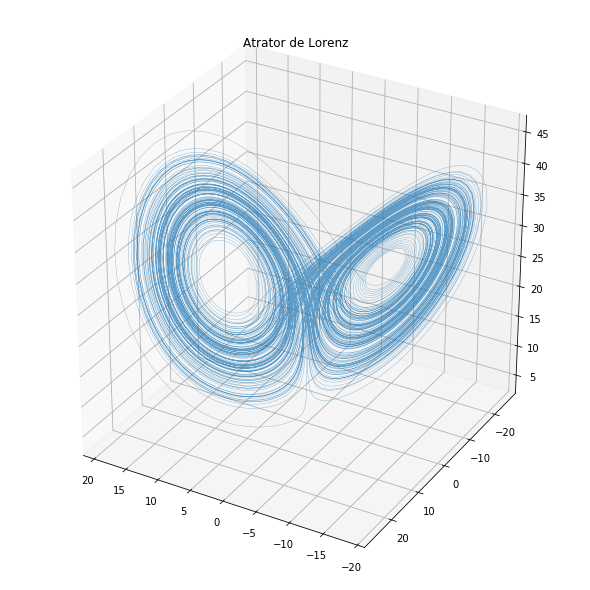

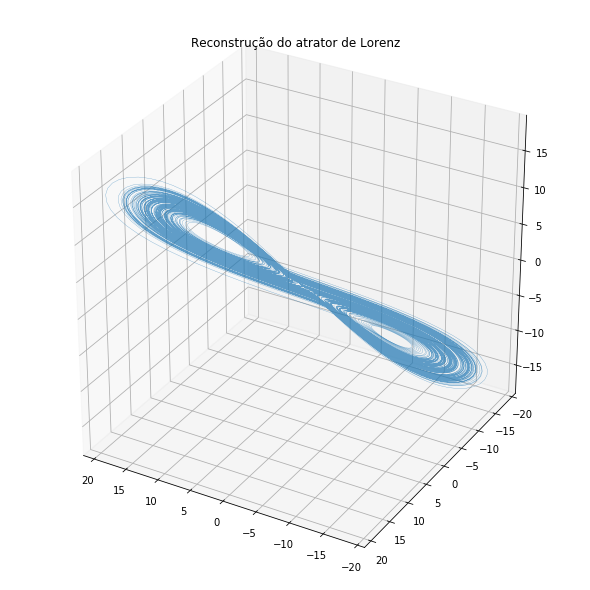

In [3]:
original_series = generate(LorenzODE())
plot3d(original_series, title="Atrator de Lorenz", angle=120)

reconstructed_series = psr(original_series[0], m=3, tau=3)
plot3d(reconstructed_series, title="Reconstrução do atrator de Lorenz", angle=120)

#### Atrator de Rossler original e reconstruído

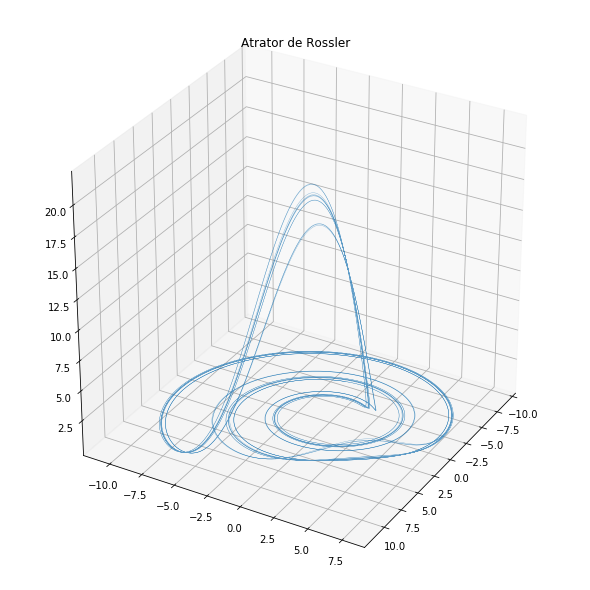

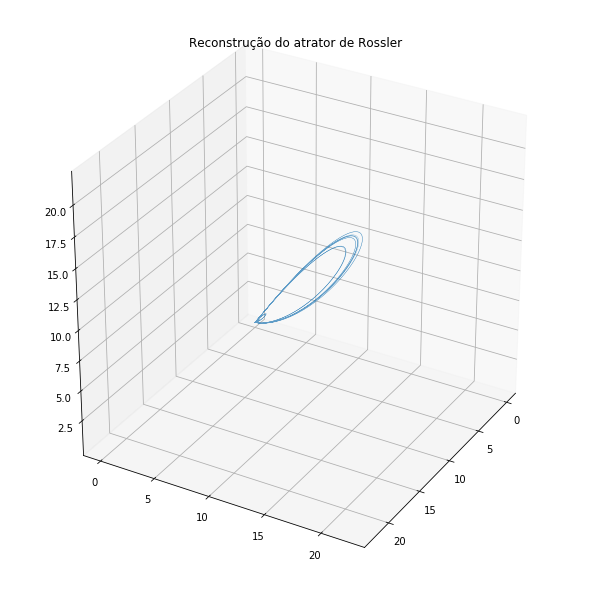

In [4]:
original_series = generate(RosslerODE())
plot3d(original_series, title="Atrator de Rossler")

reconstructed_series = psr(original_series[2], m=3, tau=3)
plot3d(reconstructed_series, title="Reconstrução do atrator de Rossler")

### Exercício 3

Implemente os métodos de cálculo de expoente de Lyapunov apresentados no artigo do Parlitz, no arquivo denominado “Parlitz-LyapunovExponent”.

In [5]:
import numpy as np
from numba import jit

#@jit(nopython=True, parallel = True)
def dist(series, i, j):
    """
    The Euclidian distance from two elements of series
    :param series: the complete time series;
    :param i: first element position from time series;
    :param j: second element position from time series;
    :return: the distance.
    """
    return np.linalg.norm(series[i] - series[j])

#@jit(nopython=True, parallel = True)
def logdist_pos(series, i, j, eta=1):
    """
    Log distance from two elements from a time series
    :param series: the complete time series
    :param i: first element position from time series
    :param j: second element position from time series
    :return: the distance.
    """
    if max(i, j) < len(series):
        distance = dist(series, i, j)
        return np.log(distance) if distance != 0 else None

# Set "nopython" mode for best performance, equivalent to @njit
#@jit(nopython=True, parallel = True) 
def nn(i, series, w=5):
    """
    Find the nearest neighbor from a time series element
    :param i: a element position from time series
    :param series: the complete time series
    :param w: Theiler window 'w' from Paralitz paper
    :return: the nearest neighbor position on series
    """
    #distances = np.max(series - series[i], axis=1)
    distances = np.apply_along_axis(np.linalg.norm, 1, series - series[i])
    
    max_dist = max(distances)
    for k in np.arange(max(0, i - w), w):
        distances[k] = max_dist
    
    return np.argmin(distances)

O maior expoente de Lyapunov corresponde ao coeficiente angular do gráfico da evolução das distâncias.

In [6]:
from numba import jit

# Set "nopython" mode for best performance, equivalent to @njit
#@jit(nopython=True, parallel = True) 
def distance_evolution(series, trajectory_len=15):
    """
    Evaluates the distances evolution mean among the points and their nearest neighbors
    
    References:
    
    M. T. Rosenstein, J. J. Collins, and C. J. De Luca,
       “A practical method for calculating largest Lyapunov exponents from
       small data sets,” Physica D: Nonlinear Phenomena, vol. 65, no. 1,
       pp. 117–134, 1993.
       
    :param series: the complete time series
    :param trajectory_len: the time (in number of data points) to follow the distance
      trajectories between two neighboring points
    :return: average trajectory distances
    """
    N=len(series)
    dlist=np.zeros((N,trajectory_len))
    
    #print("Calculando vizinhos")
    iis = np.arange(N)
    nns = np.array([nn(i, series) for i in iis])
    
    
    for k in range(trajectory_len):
        #print("Calculando a evolucao", j)
        dlist[:,k] = np.array([logdist_pos(series, i+k, nns[i]+k) for i in iis])
    
    return np.nanmean(dlist, axis=0)


from scipy.stats import linregress as lr

def lyap_from_dist(distances, debug_plot=True):
    """
    Estimates the largest Lyapunov exponent from average distances
    
    References:
    
    M. T. Rosenstein, J. J. Collins, and C. J. De Luca,
       “A practical method for calculating largest Lyapunov exponents from
       small data sets,” Physica D: Nonlinear Phenomena, vol. 65, no. 1,
       pp. 117–134, 1993.
       
    :param distances: average trajectory distances
    :return: an estimate of the largest Lyapunov exponent (a positive exponent is
      a strong indicator for chaos)
    """
    
    x = np.arange(len(distances))
    y = distances
    reg = lr(x, y)
    yr = reg.slope * x + reg.intercept
    
    if debug_plot:
        plt.scatter(x, y, alpha=0.7, s=50)
        plt.plot(x, yr, lw=1, c='r')
        plt.title("Average Distances Evolution (Lyapunov = %.2f)"% reg.slope)
        plt.show(block=False)
    
    return reg.slope

### Exercício 4

Aplique-os para os atratores de Henon, Lorenz e Rossler.

In [7]:
lorenz_series = generate(LorenzODE()).transpose()
lorenz_dists = distance_evolution(lorenz_series, 10)
lorenz_lyap = lyap_from_dist(lorenz_dists, debug_plot=False)
print("Maior expoente para o atrator de Lorenz", lorenz_lyap)

Maior expoente para o atrator de Lorenz 0.05649225122194833


In [8]:
rossler_series = generate(RosslerODE()).transpose()
rossler_dists = distance_evolution(rossler_series, 10)
rossler_lyap = lyap_from_dist(rossler_dists, debug_plot=False)
print("Maior expoente para o atrator de Rossler", rossler_lyap)

Maior expoente para o atrator de Rossler -1.5465141820745077e-05


In [9]:
henon_series = generate_discrete(HenonMap()).transpose()
henon_dists = distance_evolution(henon_series, 10)
henon_lyap = lyap_from_dist(henon_dists, debug_plot=False)
print("Maior expoente para o atrator de Henon", henon_lyap)

Maior expoente para o atrator de Henon 0.42893767031901187


### Exercício 5

Reproduza, na medida do possível, os resultados apresentados no referido artigo.

#### Outros mapas apresentados no artigo juntamente com seus atratores reconstruídos

##### Mapa de Henon original e reconstruído

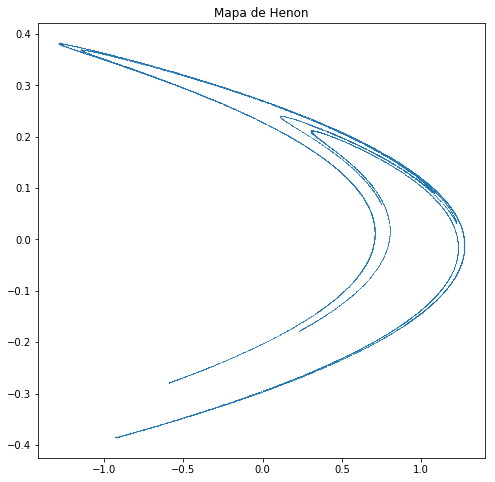

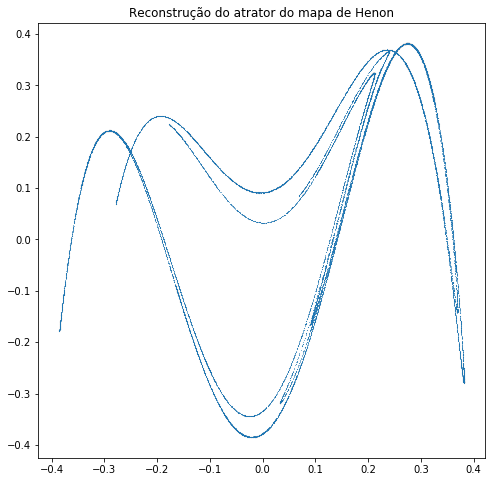

In [10]:
original_series = generate_discrete(HenonMap())
plot2d(original_series, title="Mapa de Henon")

reconstructed_series = psr(original_series[1], m=2, tau=2)
plot2d(reconstructed_series, title="Reconstrução do atrator do mapa de Henon")

##### Mapa Folded-Towel (Paralitz)

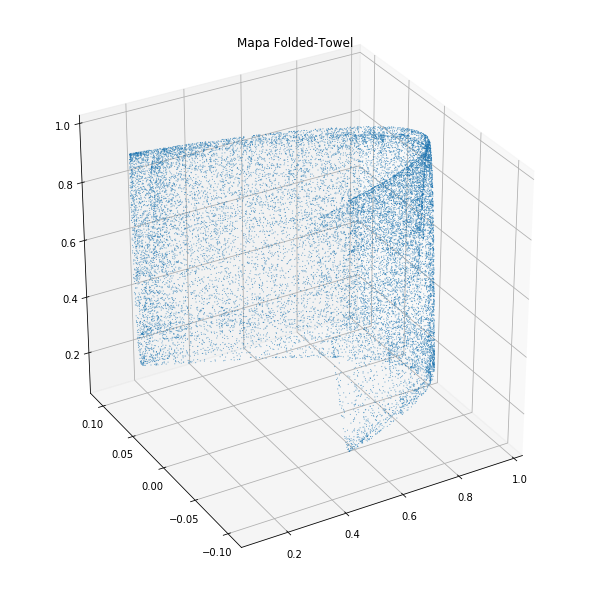

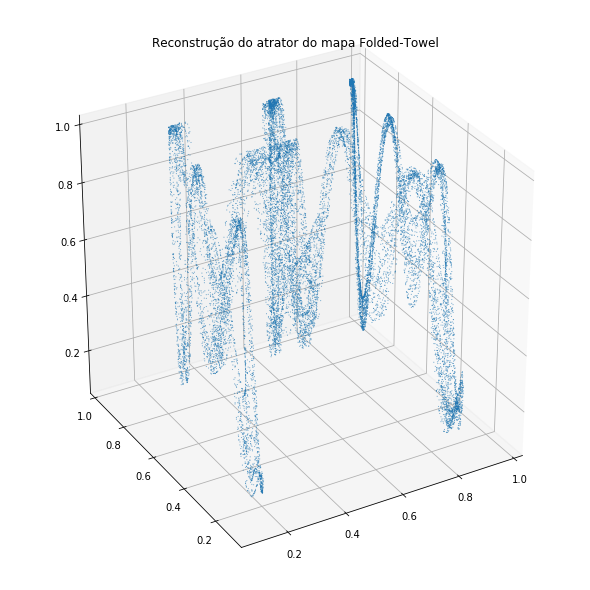

In [13]:
original_series = generate_discrete(FoldedTowelMap())
plot3d(original_series, title="Mapa Folded-Towel", angle=240, kind='scatter')

reconstructed_series = psr(original_series[0], m=3, tau=3)
plot3d(reconstructed_series, title="Reconstrução do atrator do mapa Folded-Towel", angle=240, kind="scatter")

#### Maior coeficiente de Lyapunov calculado para o mapa Folded-Towel

In [19]:
folded_towel_series = generate_discrete(FoldedTowelMap()).transpose()
folded_towel_dists = distance_evolution(folded_towel_series, 10)
folded_towel_lyap = lyap_from_dist(folded_towel_dists, debug_plot=False)
print("Maior expoente para o mapa Folded-Towel", folded_towel_lyap)

Maior expoente para o mapa Folded-Towel 0.4318511170310682


#### Limite de expansão da diferença entre as trajetórias

A interpretação do coeficiente de Lyapunov sugere que tragetórias com stados iniciais próximos se distanciam exponecialmente. Por outro lado, os atratores fazem com que as trajetórias fiquem restritas ao seu espaço de ação, portanto o distanciamento não pode ser maior que a região do atrator. Isto faz com que as distâncias entre as trajetórias se estabilizem ao longo do tempo. Isto é descrito na seção 1.3.2 do artigo e a figura 1.2 ilustra este comportamento. Os gráficos abaixo demonstram este fenômeno na prática.

No eixo x temos os instantes em que as observações foram extraídas e no eixo y temos a distância média entre trajetórias que tiveram estados iniciais próximos.

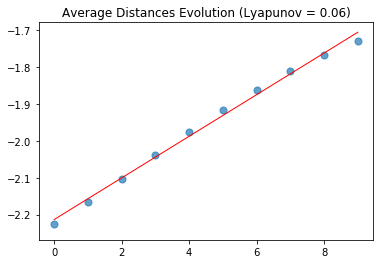

In [15]:
lorenz_lyap = lyap_from_dist(lorenz_dists)

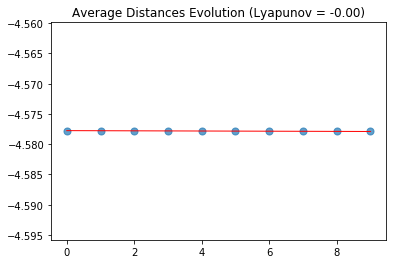

In [16]:
rossler_lyap = lyap_from_dist(rossler_dists)

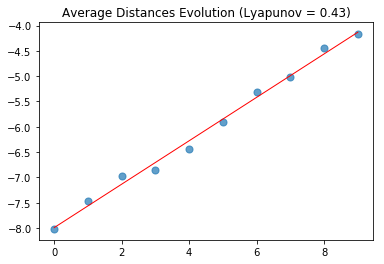

In [17]:
henon_lyap = lyap_from_dist(henon_dists)

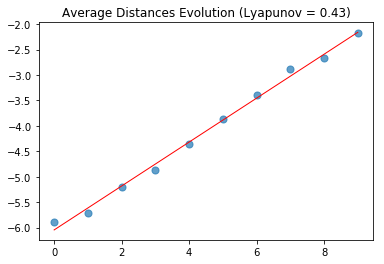

In [20]:
folded_towel_lyap = lyap_from_dist(folded_towel_dists)